#STAT 760 HW 7

## Lilly Peacor



In [1]:
#@title Importing datasets from Kaggle

from google.colab import files
#files.upload()
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

import kagglehub

path1 = kagglehub.dataset_download("marshalpatel3558/diabetes-prediction-dataset")

path2 = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")


In [2]:
#@title Diabetes dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer

diabetes = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_dataset.csv')

#investigate the dataset
diabetes.info()
diabetes.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [3]:
#preparation of diabetes data

#fixing nan in alcohol consumption
diabetes['Alcohol_Consumption'].fillna('None', inplace = True)

<ipython-input-3-9132a64b6728>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['Alcohol_Consumption'].fillna('None', inplace = True)


In [4]:
#Separate Y here
Y = diabetes['Previous_Gestational_Diabetes']
#One-Hot-Encode the Y
Y = pd.get_dummies(Y, dtype = int)

#check class balance
Y.value_counts()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
 1   1       10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


The output variable appears to be relatively balanced

In [5]:

#Get X
X = diabetes.drop(columns=['Previous_Gestational_Diabetes'])
#drop the first column that just has indexes
X = X.drop(columns=['Unnamed: 0'])

#List of qualitative variables in X
qual = ['Sex', 'Ethnicity', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level']
#List of quantitative variables in X
quant = [col for col in X.columns if col not in qual]

#One-Hot-Encode the qualitative variables
X = pd.get_dummies(X, columns=qual, dtype = int)

#splitting into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2525)

#normalizing X train columns, applying same transformation to X_test
scalar = StandardScaler()
X_train[quant] = scalar.fit_transform(X_train[quant])
X_test[quant] = scalar.transform(X_test[quant])

X_train.info()
X_test.info()
#Convert them all to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

#X_train.shape
#X.head()







<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 5703 to 6780
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               8000 non-null   float64
 1   BMI                               8000 non-null   float64
 2   Waist_Circumference               8000 non-null   float64
 3   Fasting_Blood_Glucose             8000 non-null   float64
 4   HbA1c                             8000 non-null   float64
 5   Blood_Pressure_Systolic           8000 non-null   float64
 6   Blood_Pressure_Diastolic          8000 non-null   float64
 7   Cholesterol_Total                 8000 non-null   float64
 8   Cholesterol_HDL                   8000 non-null   float64
 9   Cholesterol_LDL                   8000 non-null   float64
 10  GGT                               8000 non-null   float64
 11  Serum_Urate                       8000 non-null   float64
 12  Dietary_

In [6]:
#Start building the neural network

#X has 25 columns after OHE of categorical

#list of number of neurons in each hidden layer
hidden_layers = [60, 50, 40, 25, 15]

print(f"The number of neurons in each hidden layer is {hidden_layers}\n")

diabetes_mod = Sequential(name = "Diabetes_model")

diabetes_mod.add(InputLayer(input_shape = (X_train.shape[1],), name = 'Input_Layer'))

for i, n in enumerate(hidden_layers):
  layer_name = 'hidden_layer_'+str(i+1)
  diabetes_mod.add(Dense(n, activation = 'leaky_relu', name = layer_name))

diabetes_mod.add(Dense(2, activation = 'sigmoid', name = "Output_layer"))

diabetes_mod.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

diabetes_mod.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


The number of neurons in each hidden layer is [60, 50, 40, 25, 15]



Model: "Diabetes_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 60)             │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 40)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,337 (32.57 KB)

 Trainable params: 8,337 (32.57 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#train on the training data

#more hyperparams
epochs = 50
batch = 64

diabetes_out = diabetes_mod.fit(X_train, Y_train, epochs = epochs, batch_size = batch)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5096 - loss: 0.6973
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5187 - loss: 0.6916
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5488 - loss: 0.6890
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5635 - loss: 0.6849
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5653 - loss: 0.6827
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5708 - loss: 0.6759
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5775 - loss: 0.6698
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5957 - loss: 0.6626
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6072 - loss: 0.6573
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6327 - loss: 0.6388
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.6335
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [8]:
test_out = diabetes_mod.predict(X_test)
pred = np.argmax(test_out, axis = 1)

real = np.argmax(Y_test, axis = 1)

#count the combinations in pred
print(np.unique(pred, return_counts = True))
print(np.unique(real, return_counts = True))
#accuracy calculation
test_acc = np.mean(pred == real)
#for i in range(len(pred)):
  #print(f"Prediction: {np.round(test_out[i,],0)} Real: {Y_test[i,]}")
#test_acc = count/len(pred)
#print(count)
#confusion matrix
conf_mat = confusion_matrix(real, pred)

print(f"The accuracy on the test set is {test_acc*100}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(array([0, 1]), array([ 917, 1083]))
(array([0, 1]), array([ 965, 1035]))
The accuracy on the test set is 50.7%


Text(0, 0.5, 'Actual')

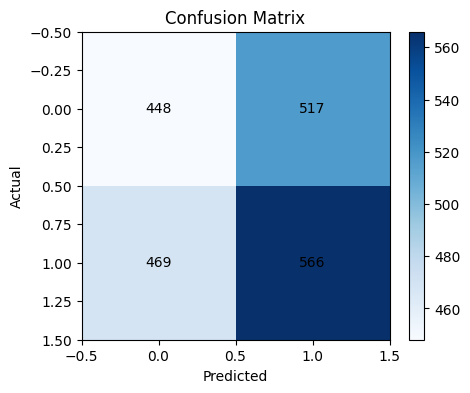

In [9]:
plt.figure(figsize = (5,4))
plt.imshow(conf_mat, cmap = 'Blues')
plt.colorbar()
for i in range(conf_mat.shape[0]):
  for j in range(conf_mat.shape[1]):
    plt.text(j, i, conf_mat[i, j], ha = 'center', va = 'center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

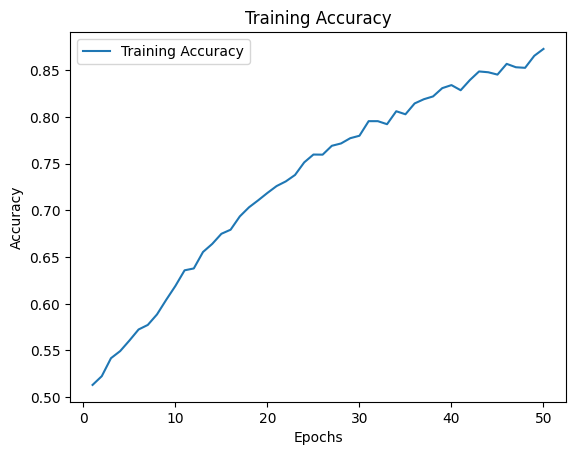

In [10]:
#Learning curves

acc = diabetes_out.history['accuracy']
loss = diabetes_out.history['loss']

epochs_range = [i for i in range(1, epochs+1)]

plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This is clearly not working, and no changes to hyperparameters would fix it. We now move to checking colinearity of covariates.

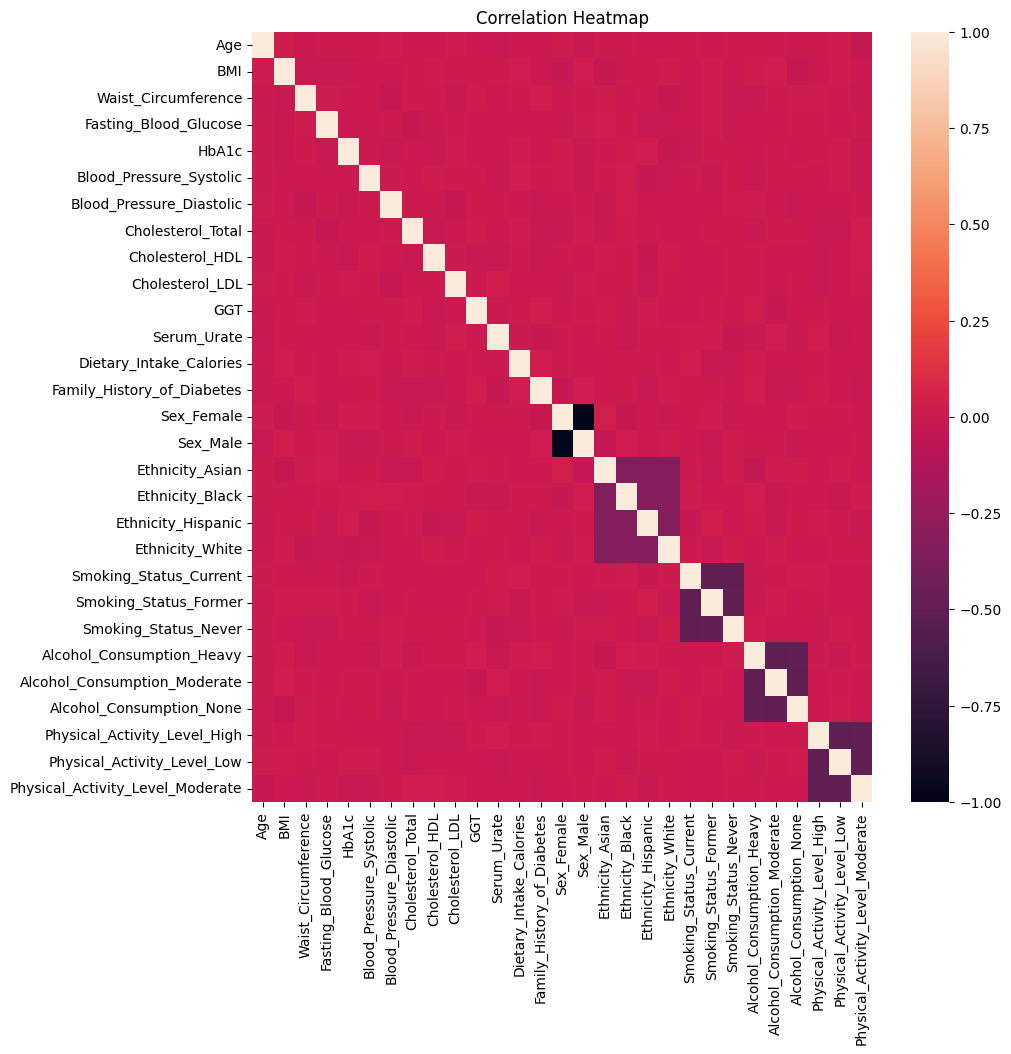

In [11]:
#Check covariates for colinearity
correlations = X.corr()

#plot the correlations as a heatmap
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.heatmap(correlations, annot = False)
plt.title("Correlation Heatmap")
plt.show()

Covariates appear to not be highly correlated, so I will check the variance inflation factors.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#convert X back to pandas dataframe so that functions show names
X_df = pd.DataFrame(X)

#Compute and show VIF for each
vif = pd.DataFrame()
vif['Covariate'] = X_df.columns
vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_sorted = vif.sort_values(by = 'VIF', ascending = False)
vif_sorted

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Covariate,VIF
27,Physical_Activity_Level_Low,inf
24,Alcohol_Consumption_Moderate,inf
23,Alcohol_Consumption_Heavy,inf
22,Smoking_Status_Never,inf
25,Alcohol_Consumption_None,inf
21,Smoking_Status_Former,inf
20,Smoking_Status_Current,inf
18,Ethnicity_Hispanic,inf
19,Ethnicity_White,inf
17,Ethnicity_Black,inf


After extensive testing as well as checking alternative models and discussion with colleagues and the course instructor, it appears that this dataset cannot be adequately classified by standard means when a model is applied to a separate testing dataset from the portion used to train. Adding depth to the neural network increases accuracy on the training data, but in all cases the testing data accuracy is left near $50\%$. It is currently unknown why this is happening, and different transformations to the data also does not result in accuracy better than a shot in the dark.

In [13]:
#Preparing dataset 2

cancer = pd.read_csv('/kaggle/input/global-cancer-patients-2015-2024/global_cancer_patients_2015_2024.csv')

cancer.info()
cancer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [14]:
cancer.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [15]:
#removing Patient_ID column
cancer = cancer.drop(columns = ['Patient_ID'])

#saving list of qualitative variables
cancer_qual = [col for col in cancer.columns if cancer[col].dtype == 'object'] + ['Year']

#one-hot-encoding the categoricals
cancer = pd.get_dummies(cancer, columns = cancer_qual, dtype = int)

C = cancer.drop(columns = ['Target_Severity_Score'])
CY = cancer['Target_Severity_Score']

#splitting into train and test
C_train, C_test, CY_train, CY_test = train_test_split(C, CY, test_size = 0.2, random_state = 2525 )

#normalizing on train data for quantitative variables
cancer_quant = [col for col in C.columns if col not in cancer_qual]
c_scalar = StandardScaler()
C_train[cancer_quant] = c_scalar.fit_transform(C_train[cancer_quant])
C_test[cancer_quant] = c_scalar.transform(C_test[cancer_quant])

#converting to numpy arrays
C_train = C_train.to_numpy()
C_test = C_test.to_numpy()
CY_train = CY_train.to_numpy()
CY_test = CY_test.to_numpy()

In [16]:
#number of covariates
features = C_train.shape[1]
features
C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Genetic_Risk              50000 non-null  float64
 2   Air_Pollution             50000 non-null  float64
 3   Alcohol_Use               50000 non-null  float64
 4   Smoking                   50000 non-null  float64
 5   Obesity_Level             50000 non-null  float64
 6   Treatment_Cost_USD        50000 non-null  float64
 7   Survival_Years            50000 non-null  float64
 8   Gender_Female             50000 non-null  int64  
 9   Gender_Male               50000 non-null  int64  
 10  Gender_Other              50000 non-null  int64  
 11  Country_Region_Australia  50000 non-null  int64  
 12  Country_Region_Brazil     50000 non-null  int64  
 13  Country_Region_Canada     50000 non-null  int64  
 14  Countr

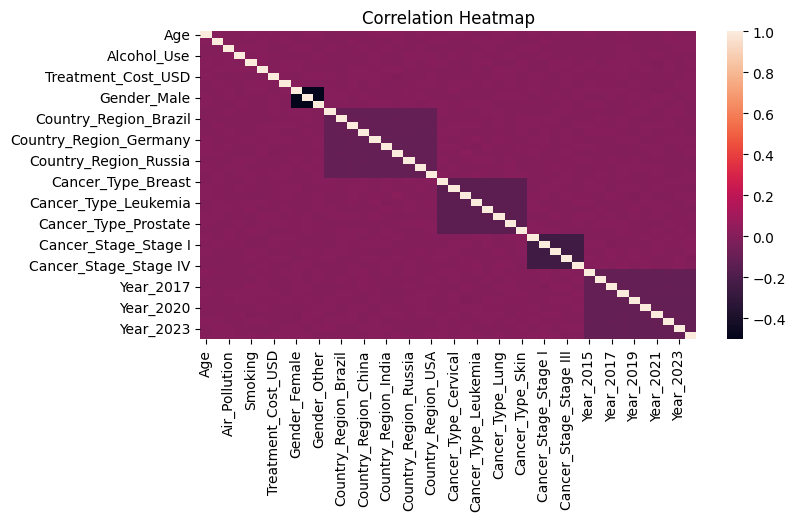

In [17]:
#Check for correlated features
c_corr = C.corr()
plt.figure(figsize = (8, 4))
sns.heatmap(c_corr, annot = False)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
#number of hidden layers
c_hidden = [80, 70, 60, 40, 30, 10]

#build the neural network
print(f"The number of neurons in each hidden layer is {c_hidden}\n")

cancer_mod = Sequential(name = "Cancer_model")

cancer_mod.add(InputLayer(input_shape = (features,), name = 'Input_Layer'))

for i, n in enumerate(c_hidden):
  layer_name = 'hidden_layer_'+str(i+1)
  cancer_mod.add(Dense(n, activation = 'leaky_relu', name = layer_name))

cancer_mod.add(Dense(1, activation = 'relu', name = "Output_layer"))

cancer_mod.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse', 'mae'])

cancer_mod.summary()

The number of neurons in each hidden layer is [80, 70, 60, 40, 30, 10]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Cancer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 80)             │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 70)             │         5,670 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 60)             │         4,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,521 (68.44 KB)

 Trainable params: 17,521 (68.44 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#train the model

epochs = 40
batch = 100

cancer_out = cancer_mod.fit(C_train, CY_train, epochs = epochs, batch_size = batch)

Epoch 1/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.0198 - mae: 1.1763 - mse: 4.0198
Epoch 2/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0495 - mae: 0.1766 - mse: 0.0495
Epoch 3/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0238 - mae: 0.1225 - mse: 0.0238
Epoch 4/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0161 - mae: 0.1006 - mse: 0.0161
Epoch 5/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0123 - mae: 0.0883 - mse: 0.0123
Epoch 6/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0098 - mae: 0.0784 - mse: 0.0098
Epoch 7/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0080 - mae: 0.0709 - mse: 0.0080
Epoch 8/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0065 - mae: 0.0643 - mse: 0.0065
Epoch 9/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0057 - mae: 0.0598 - mse: 0.0057
Epoch 10/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0052 - mae: 0.0573 - mse: 0.0052
Epoch 11/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/s

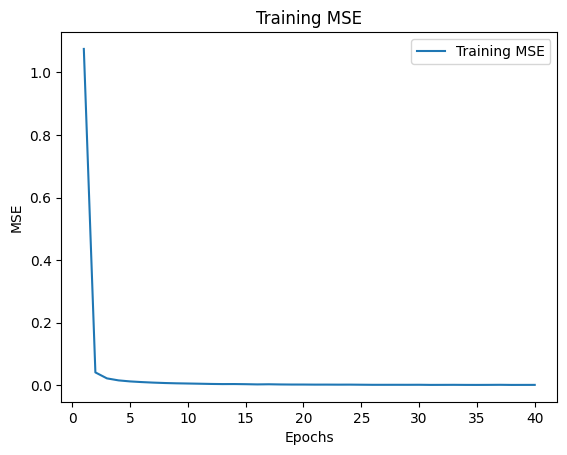

In [20]:
mse = cancer_out.history['mse']

epochs_range = [i for i in range(1, epochs + 1)]
#plot mse
plt.plot(epochs_range, mse, label = 'Training MSE')
plt.title('Training MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [27]:
#check test mse
from sklearn.metrics import mean_squared_error
test_out = cancer_mod.predict(C_test)
test_mse = mean_squared_error(CY_test, test_out)
print(f"The test MSE is {test_mse}")
print(f"The final MSE on training data is {mse[-1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The test MSE is 0.0004915957128192808
The final MSE on training data is 0.0006926725618541241


This model works extremely well. Every time hyperparameters are tweaked by adding more neurons or adding or removing layers, we surprisingly see a MSE on testing data lower than the MSE on training data. Further increasing depth or number of epochs does not substantially change the final MSE on test, nor does it change the difference between test MSE and train MSE by a significant margin. This number of epochs appears to be ideal as greater numbers appear to have diminishing returns for significantly higher computational cost.